In [ ]:
from __future__ import print_function
from scipy import io
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from xgboost import XGBClassifier

In [2]:
#Initialize patient no.
patient = 7

In [3]:
# Download and save the dataset to your drive and put its path in the below function
d=(io.loadmat('/content/drive/My Drive/dataset/parsed_P0'+str(patient)+'T.mat'))
trm=d['RawEEGData'][0].flatten()
trm=np.abs(np.fft.fft(trm))
ans=np.array(np.around(trm),dtype=int)
for i in range(1,80):
    trm=d['RawEEGData'][i].flatten()
    trm=np.abs(np.fft.fft(trm))
    ans=np.vstack((ans,trm))
l=(io.loadmat('/content/drive/My Drive/dataset/parsed_P0'+str(patient)+'T.mat'))['Labels']

Y=l
X=ans

Y.resize(80,)
print(X.shape)
print(Y.shape)

(80, 49152)
(80,)


In [4]:
X_train = X
y_train = Y

In [5]:
d=(io.loadmat('/content/drive/My Drive/dataset/parsed_P0'+str(patient)+'E.mat'))
print(d['RawEEGData'].shape)
trm=d['RawEEGData'][0].flatten()
trm=np.abs(np.fft.fft(trm))
ans=np.array(np.around(trm),dtype=int)
for i in range(1,40):
    trm=d['RawEEGData'][i].flatten()
    trm=np.abs(np.fft.fft(trm))
    ans=np.vstack((ans,trm))

X_test = ans
print(X_test.shape)

(40, 12, 4096)
(40, 49152)


In [6]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [7]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 64
Number of data points in test data: 40
Number of data points in cross validation data: 16


Processing alpha : 10
Processing alpha : 50
Processing alpha : 100
Processing alpha : 500
Processing alpha : 1000
Processing alpha : 2000
log_loss for c =  10 is 0.5880181242276998
log_loss for c =  50 is 0.5476509735200985
log_loss for c =  100 is 0.5409491840806937
log_loss for c =  500 is 0.540951926061695
log_loss for c =  1000 is 0.5409552243900394
log_loss for c =  2000 is 0.540954983677888


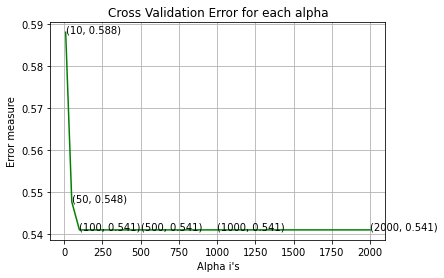

For values of best alpha =  100 The train log loss is: 0.23015564647825937
For values of best alpha =  100 The cross validation log loss is: 0.5409491840806937


In [9]:
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    print('Processing alpha :',i)
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))

In [10]:
predict_y = sig_clf.predict_proba(X_test)
print(predict_y)

[[0.52901829 0.47098171]
 [0.67115235 0.32884765]
 [0.65957254 0.34042746]
 [0.45035194 0.54964806]
 [0.55151182 0.44848818]
 [0.27461339 0.72538661]
 [0.54158597 0.45841403]
 [0.55526447 0.44473553]
 [0.52948081 0.47051919]
 [0.44713996 0.55286004]
 [0.53846437 0.46153563]
 [0.49524848 0.50475152]
 [0.58708442 0.41291558]
 [0.56070502 0.43929498]
 [0.62963909 0.37036091]
 [0.61456446 0.38543554]
 [0.70236519 0.29763481]
 [0.6496413  0.3503587 ]
 [0.70301726 0.29698274]
 [0.56538179 0.43461821]
 [0.68499541 0.31500459]
 [0.69037358 0.30962642]
 [0.692553   0.307447  ]
 [0.5261292  0.4738708 ]
 [0.72792226 0.27207774]
 [0.64172078 0.35827922]
 [0.72195462 0.27804538]
 [0.68138794 0.31861206]
 [0.65194831 0.34805169]
 [0.66156329 0.33843671]
 [0.63521251 0.36478749]
 [0.58715633 0.41284367]
 [0.56945952 0.43054048]
 [0.77492812 0.22507188]
 [0.72951958 0.27048042]
 [0.69684835 0.30315165]
 [0.71055945 0.28944055]
 [0.73818576 0.26181424]
 [0.77374608 0.22625392]
 [0.78320179 0.21679821]]

In [11]:
probas = predict_y
labels = np.argmax(probas, axis=-1)    
for i in range(40):
  if labels[i]==0:
    labels[i]=1
  else:
    labels[i]=2

for i in range(40):
  print(labels[i])

1
1
1
2
1
2
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
